In [1]:
import keras


Using TensorFlow backend.


# Data Set Preprocessing


In [2]:
import urllib.request, json 
with urllib.request.urlopen("http://statistik.easycredit-bbl.de/XML/exchange/540/Schedule.php?type=json&saison=2017&fixedGamesOnly=0") as url:
    games = json.loads(url.read().decode())
    #print(json.dumps(games, indent=4, sort_keys=True))
    

In [3]:


arena=[]
home_ids=[]
for i in range(0,len(games['competition'][0]['spiel'])):
               
    if games['competition'][0]['spiel'][i]['home_id'] not in home_ids:
        arena.append(games['competition'][0]['spiel'][i]['arenaName'])
        home_ids.append(games['competition'][0]['spiel'][i]['home_id'])

               

In [4]:
from datetime import datetime

datetime_object = datetime.strptime(games['competition'][0]['spiel'][0]['datum']+" "+games['competition'][0]['spiel'][0]['uhrzeit']  , '%Y-%m-%d %H:%M:%S')

print(datetime_object)
print(datetime_object.strftime('%U'))
print(datetime_object.strftime('%w'))


2017-09-29 20:30:00
39
5


In [5]:
#dictionary für die Hallenkapazitäten
arenakap = {486:6594,413:14500,433:4200,420:6150,415:6000,425:3300,430:6000,426:5002,540:3140,418:6200,421:4003,422:3603,483:3076,477:3447,428:3000,439:4200,517:3533,432:3132}
print(arenakap)
print(len(arenakap))


{486: 6594, 413: 14500, 433: 4200, 420: 6150, 415: 6000, 425: 3300, 430: 6000, 426: 5002, 540: 3140, 418: 6200, 421: 4003, 422: 3603, 483: 3076, 477: 3447, 428: 3000, 439: 4200, 517: 3533, 432: 3132}
18


In [6]:
print(type(games['competition'][0]['spiel'][0]['home_id']))
#Die JSON Informationen sind als String angegeben

<class 'str'>


Deshalb parse (int) ich die Zuschauer und home_id für die weitere Berechnung

In [93]:
#Dataset zusammenstellen
dataset=[]
calendarWeeks=[]
weekDays=[]

for i in range(0,len(games['competition'][0]['spiel'])):
    datasetrow=[]     
    datasetrow.append(games['competition'][0]['spiel'][i]['home_id'])
    datasetrow.append(games['competition'][0]['spiel'][i]['gast_id'])
    datasetrow.append(int(games['competition'][0]['spiel'][i]['home_result']>games['competition'][0]['spiel'][i]['gast_result']))
    datasetrow.append(int(games['competition'][0]['spiel'][i]['zuschauer']))
    datasetrow.append(arenakap[int(games['competition'][0]['spiel'][i]['home_id'])])
    datetime_object = datetime.strptime(games['competition'][0]['spiel'][i]['datum']+" "+games['competition'][0]['spiel'][i]['uhrzeit']  , '%Y-%m-%d %H:%M:%S')
    kw = datetime_object.strftime('%U')
    datasetrow.append(datetime_object.strftime('%U'))
    if kw not in calendarWeeks:
        calendarWeeks.append(kw)
    days = datetime_object.strftime('%w')
    datasetrow.append(datetime_object.strftime('%w'))
    if days not in weekDays:
        weekDays.append(days)
    
    dataset.append(datasetrow)

#print(dataset)
print(calendarWeeks)
print(weekDays)
# Eingangsneuronen - abhängig vom Dataset --> KW (32) Days (7)

['39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17']
['5', '6', '1', '2', '3', '4', '0']


In [94]:
# Umwandlung des Datasets in ein Numpy Array 
import numpy as np
# : -> auslesen aller zeilen
dataset=np.asarray(dataset)
print(dataset[:,0])
print(len(dataset))

['540' '422' '483' '418' '477' '421' '432' '428' '413' '420' '426' '483'
 '425' '486' '517' '415' '439' '413' '517' '477' '418' '428' '430' '540'
 '432' '422' '421' '433' '426' '430' '477' '486' '483' '433' '432' '415'
 '425' '418' '413' '422' '428' '486' '421' '540' '421' '413' '422' '477'
 '415' '433' '430' '439' '426' '418' '540' '486' '428' '483' '420' '425'
 '432' '517' '477' '422' '421' '432' '483' '439' '413' '426' '433' '420'
 '428' '418' '430' '425' '439' '415' '486' '517' '420' '477' '426' '430'
 '432' '421' '540' '415' '486' '439' '413' '486' '422' '425' '418' '433'
 '483' '517' '420' '428' '426' '540' '486' '432' '420' '421' '415' '425'
 '420' '439' '422' '418' '477' '433' '517' '430' '426' '483' '421' '418'
 '425' '428' '413' '540' '432' '422' '426' '517' '477' '420' '433' '483'
 '413' '540' '415' '418' '517' '439' '432' '428' '430' '425' '422' '477'
 '439' '421' '433' '430' '426' '428' '420' '421' '415' '430' '428' '439'
 '415' '517' '540' '413' '418' '421' '433' '432' '4

One hot encoding



In [95]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transformed_home_ids = encoder.fit_transform(dataset[:,0])

print(transformed_home_ids)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [96]:
#ohne fit, damit die Teams eindeutig bleiben, nur transformation notwendig
transformed_gast_ids = encoder.transform(dataset[:,1])
print(transformed_gast_ids)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [97]:
transformed_calendarWeek = encoder.fit_transform(dataset[:,5])
print(len(transformed_calendarWeek[0]))
transformed_weekDay = encoder.fit_transform(dataset[:,6])
print(len(transformed_weekDay[0]))

32
7


In [98]:
# Umformung der Zuschauer in eine Spalte (vorher war es nur eine Zeile)
#print(np.reshape(dataset[:,3],(306,1)))


In [99]:
# Featurescaling der Zuschaueranzahl & Hallenkapazitäten
from sklearn.preprocessing import MinMaxScaler

arenaKap_scaler=MinMaxScaler()
arenaKap_scaler.fit([[0],[14500]]) #Maximum Berlin und 0 Minimum
#reshaping
transformed_zuschauer=arenaKap_scaler.transform(np.reshape(dataset[:,3],(306,1)))
transformed_kap=arenaKap_scaler.transform(np.reshape(dataset[:,4],(306,1)))
#print(transformed_kap)

### Data - Zusammenfügen der Spalten home_ids, gast_ids,  zuschauer, Hallenkapazität, home_win

In [100]:
data=np.c_[transformed_home_ids,transformed_gast_ids,transformed_zuschauer,transformed_kap,dataset[:,2],transformed_calendarWeek,transformed_weekDay]
np.random.shuffle(data)
print(data)

[['0' '1' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '1']
 ['0' '0' '0' ... '0' '1' '0']
 ...
 ['0' '0' '1' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '1']
 ['0' '0' '0' ... '0' '1' '0']]


In [101]:
print(len(data[0]))

78


# Netz Modellierung

In [102]:
# Importing the Keras libraries and packages 
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

adam = optimizers.Adam(lr=0.001) # lernrate

# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units = 77, kernel_initializer = 'uniform', activation = 'relu', input_shape = (77,)))

# Adding the second hidden layer
#regressor.add(Dense(units = 18, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#Summary anzeigen
regressor.summary()

# Compiling the ANN - wie soll es lernen
regressor.compile(optimizer = adam, loss = 'mean_squared_error', metrics = ['accuracy'])#binary_crossentropy

# Fitting the ANN to the Training set 
#input = data[:,0:4] output= (data[:,4]
history = regressor.fit(data[:,0:77], data[:,77], batch_size = 10, epochs = 50, validation_split = 0.3)





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 77)                6006      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 78        
Total params: 6,084
Trainable params: 6,084
Non-trainable params: 0
_________________________________________________________________
Train on 214 samples, validate on 92 samples
Epoch 1/50
214/214 [==============================] - 0s 2ms/step - loss: 0.2442 - acc: 0.6963 - val_loss: 0.2385 - val_acc: 0.6630
Epoch 2/50
214/214 [==============================] - 0s 238us/step - loss: 0.2244 - acc: 0.7103 - val_loss: 0.2165 - val_acc: 0.6630
Epoch 3/50
214/214 [==============================] - 0s 237us/step - loss: 0.1929 - acc: 0.7103 - val_loss: 0.1959 - val_acc: 0.6630
Epoch 4/50
214/214 [==============================] - 0s 232us/step - loss: 0.1669 - acc: 0

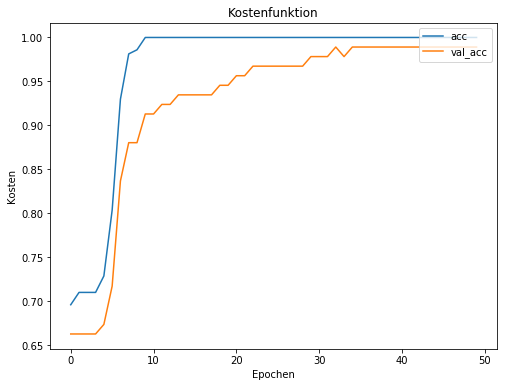

In [103]:
#
import matplotlib.pyplot as plt

handles = []

label, = plt.plot(history.history['acc'], label="acc")
handles.append(label)
label, = plt.plot(history.history['val_acc'], label="val_acc")
handles.append(label)
plt.title('Kostenfunktion')
plt.ylabel('Kosten')
plt.xlabel('Epochen')
plt.legend(handles=handles, loc='upper right')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6) # um die größe des Plots anzupassen
#plt.savefig(pathpathpaht) # hiermit kannst das ding als auch als bild an dem angegebenen ort plus name ablegen
plt.show()



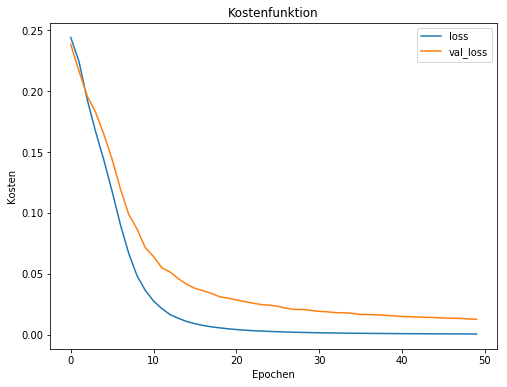

In [105]:
handles = []

label, = plt.plot(history.history['loss'], label="loss")
handles.append(label)
label, = plt.plot(history.history['val_loss'], label="val_loss")
handles.append(label)
plt.title('Kostenfunktion')
plt.ylabel('Kosten')
plt.xlabel('Epochen')
plt.legend(handles=handles, loc='upper right')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6) # um die größe des Plots anzupassen
#plt.savefig(pathpathpaht) # hiermit kannst das ding als auch als bild an dem angegebenen ort plus name ablegen
plt.show()

In [46]:
import time as tm
import datetime
import pickle
      
        
def create_file_name():
    ts = tm.time()
    name = datetime.datetime.fromtimestamp(ts).strftime('%Y%m%d%H%M%S') + '_ann'
    return name

path='./Netze/'
name_file= create_file_name()



In [47]:
with open(path + name_file + '.pkl', 'wb') as output:
    ann_net = {'history_val_loss':history.history['val_loss'],'history_loss':history.history['loss']}
    pickle.dump(ann_net, output)

In [96]:
with open(path + '20180521172401_ann.pkl', 'rb') as input:
    ann_net = pickle.load(input)
    print(ann_net[15])

10
